In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [111]:
df = pd.read_csv("movies.csv")

In [112]:
df.head() #read files using pandas

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### DATA CLEANING


In [114]:
df.drop(columns=['Gross'], inplace=True) # Too many nulls, so I removed the column 
df.drop(columns=['ONE-LINE'], inplace=True) # useless , so I removed the column
df.drop(columns=["VOTES"], inplace=True)

In [115]:
df.duplicated().sum() # we saw how many duplicate values are there  

np.int64(655)

In [116]:
df.drop_duplicates(inplace=True) # we removed them

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9344 non-null   object 
 1   YEAR     8803 non-null   object 
 2   GENRE    9266 non-null   object 
 3   RATING   8019 non-null   float64
 4   STARS    9344 non-null   object 
 5   RunTime  6959 non-null   float64
dtypes: float64(2), object(4)
memory usage: 511.0+ KB


In [118]:
df = df.dropna(axis=0, subset = "MOVIES") # we removed all that had no movie name

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9344 non-null   object 
 1   YEAR     8803 non-null   object 
 2   GENRE    9266 non-null   object 
 3   RATING   8019 non-null   float64
 4   STARS    9344 non-null   object 
 5   RunTime  6959 non-null   float64
dtypes: float64(2), object(4)
memory usage: 511.0+ KB


In [120]:
def clean_stars(stars):
    stars = str(stars).strip()
    return stars.replace("\n", "") # we have used .strip
    
df["STARS"] = df["STARS"].apply(clean_stars)    
df['Director'] = df["STARS"].str.extract(r'Director:([\w\s]+)\|')

In [121]:
df["Director"].isnull().sum()

np.int64(4759)

In [122]:
df.iloc[1]["STARS"]

'Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill'

In [123]:
df.iloc[2]["STARS"]

'Stars:Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan'

In [124]:
df.iloc[3]["STARS"]

'Stars:Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke'

In [125]:
df.iloc[5]["STARS"]

'Stars:Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss'

In [126]:
df[df["Director"].isnull()]

,MOVIES,YEAR,GENRE,RATING,STARS,RunTime,Director
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Parnell, Spencer G...",23.0,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",50.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"Stars:Michael C. Hall, Jennifer Carpenter, Dav...",53.0,NaN
...,...,...,...,...,...,...,...
9975,Ultraman,(2019– ),"\nAnimation, Action, Adventure",NaN,"Stars:Ryohei Kimura, Josh Hutcherson",NaN,NaN
9980,1899,(2022– ),"\nDrama, History, Horror",NaN,Director:Baran bo Odar,NaN,NaN
9986,The Last Kingdom,(2015– ),"\nAction, Drama, History",NaN,,NaN,NaN
9987,The Last Kingdom,(2015– ),"\nAction, Drama, History",NaN,Director:Anthony Philipson,NaN,NaN


In [127]:
df.iloc[3752]


MOVIES                                            Oh My Ghost
YEAR                                                 (2018– )
GENRE                                    \nComedy            
RATING                                                    7.4
STARS       Stars:Arak Amornsupasiri, Vivid Bavornkiratika...
RunTime                                                  65.0
Director                                                  NaN
Name: 3752, dtype: object

In [128]:
df["Director"].isnull().sample(10)

4891     True
2391     True
6898    False
249      True
5969    False
7153     True
932      True
8334    False
4388     True
4573    False
Name: Director, dtype: bool

In [129]:
df['Director'] = df['Director'].fillna(df["Director"].mode()[0]) # instead use web scrapping
df["Director"]

0             Peter Thorwarth
1                  Adam Heydt
2                  Adam Heydt
3                  Adam Heydt
4       Matthias Schweighöfer
                ...          
9993            Nicolai Rohde
9995               Adam Heydt
9996    Orlando von Einsiedel
9997         Jovanka Vuckovic
9998         Jovanka Vuckovic
Name: Director, Length: 9344, dtype: object

In [130]:
df['STARS'].unique().tolist()


['Director:Peter Thorwarth|     Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti',
 'Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill',
 'Stars:Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan',
 'Stars:Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke',
 'Director:Matthias Schweighöfer|     Stars:Matthias Schweighöfer, Nathalie Emmanuel, Ruby O. Fee, Stuart Martin',
 'Stars:Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss',
 'Director:Augustine Frizzell|     Stars:Shailene Woodley, Joe Alwyn, Wendy Nottingham, Felicity Jones',
 'Stars:Michael C. Hall, Jennifer Carpenter, David Zayas, James Remar',
 'Stars:Maitreyi Ramakrishnan, Poorna Jagannathan, Darren Barnet, John McEnroe',
 'Stars:Alexandra Breckenridge, Martin Henderson, Colin Lawrence, Tim Matheson',
 'Director:Navot Papushado|     Stars:Karen Gillan, Lena Headey, Carla Gugino, Michelle Yeoh',
 'Stars:Tom Ellis, Lesley-Ann Brandt, Lauren German, D.B. Woodsid

In [131]:
df.groupby("GENRE")["RunTime"].mean()

GENRE
\nAction                                       95.523810
\nAction, Adventure                           106.333333
\nAction, Adventure, Biography                164.750000
\nAction, Adventure, Comedy                    67.206349
\nAction, Adventure, Crime                     78.857143
                                                 ...    
\nTalk-Show, Sport                             89.500000
\nThriller                                    105.000000
\nThriller, Mystery                                  NaN
\nWar                                          18.000000
\nWestern                                      87.800000
Name: RunTime, Length: 510, dtype: float64

In [132]:
df['RunTime'] = df['RunTime'].fillna(df['RunTime'].median()) # we filled in the missing values with median
df['RATING'] = df['RATING'].fillna(df['RATING'].median())


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9344 non-null   object 
 1   YEAR      8803 non-null   object 
 2   GENRE     9266 non-null   object 
 3   RATING    9344 non-null   float64
 4   STARS     9344 non-null   object 
 5   RunTime   9344 non-null   float64
 6   Director  9344 non-null   object 
dtypes: float64(2), object(5)
memory usage: 584.0+ KB


In [134]:
df['YEAR'] = df['YEAR'].fillna("nan")

In [135]:
df["YEAR"].unique().tolist()

['(2021)',
 '(2021– )',
 '(2010–2022)',
 '(2013– )',
 '(2020– )',
 '(2006–2013)',
 '(2019– )',
 '(2016–2021)',
 '(2011– )',
 '(2005– )',
 '(2008–2013)',
 '(2017– )',
 '(2017–2021)',
 '(2016– )',
 '(1994–2004)',
 '(2014– )',
 '(2013–2020)',
 '(2015– )',
 '(2005–2020)',
 '(2013–2022)',
 '(2003– )',
 '(2009–2020)',
 '(I) (2018– )',
 '(2010–2015)',
 '(2011–2019)',
 '(2015–2020)',
 '(2005–2014)',
 '(2009–2015)',
 '(2008–2014)',
 '(2016–2018)',
 '(2009–2017)',
 '(2020)',
 '(2018–2021)',
 '(2017–2020)',
 '(1987–1994)',
 '(2018– )',
 '(2012– )',
 '(2014–2020)',
 '(2011–2018)',
 '(2005–2017)',
 '(2017)',
 '(2007–2015)',
 '(2000–2007)',
 '(II) (2007– )',
 '(1993)',
 '(1999–2022)',
 '(2015–2018)',
 '(2014–2019)',
 '(2016)',
 '(2012–2020)',
 '(2013–2019)',
 '(2007–2012)',
 '(2011–2020)',
 '(2010–2017)',
 '(2000–2015)',
 '(2015–2021)',
 '(2001)',
 '(1997– )',
 '(2011–2017)',
 '(1993–1999)',
 '(1989–1998)',
 '(2010–2013)',
 '(2010–2020)',
 '(2003–2019)',
 '(I) (2019)',
 '(2017–2019)',
 '(1975)',
 '(

In [136]:
def clean_year(year):  # cleaning year
    # Ensure the value is a string (handle cases where the year might be a float or NaN)
    year = str(year).strip()
    
    # Remove unwanted characters using regex (anything that's not a digit)
    year = re.sub(r'[^0-9]', '', year)
    
    # Check if the cleaned year contains only digits and has at least 4 digits
    if year.isdigit() and len(year) >= 4:
        return int(year[:4])  # Return the first 4 digits as an integer
    
    # Return a default value (e.g., None or 0) for invalid years
    return None  

df["YEAR"] = df["YEAR"].apply(clean_year)

In [137]:
df['YEAR'] = df['YEAR'].fillna(df['YEAR'].median())
df["YEAR"]

0       2021.0
1       2021.0
2       2010.0
3       2013.0
4       2021.0
         ...  
9993    2022.0
9995    2021.0
9996    2022.0
9997    2021.0
9998    2021.0
Name: YEAR, Length: 9344, dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9344 non-null   object 
 1   YEAR      9344 non-null   float64
 2   GENRE     9266 non-null   object 
 3   RATING    9344 non-null   float64
 4   STARS     9344 non-null   object 
 5   RunTime   9344 non-null   float64
 6   Director  9344 non-null   object 
dtypes: float64(3), object(4)
memory usage: 584.0+ KB


In [139]:
def clean_genre(genre): # cleaning genre
    if isinstance(genre, str):  # Check if the value is a string
        genre = str(genre).strip()
        genre = genre.replace("\n", "")# Remove \n
        genre = genre.replace("$$", "")
        x = genre.split(",")
        return x[0]  # Return the first genre
    else:
        return genre  # Handle non-string values (e.g., NaN)
df["GENRE"] = df['GENRE'].apply(clean_genre)

In [140]:
df['GENRE'] = df['GENRE'].fillna(df['GENRE'].mode()[0])

In [141]:
df["GENRE"].value_counts()

GENRE
Comedy         1972
Animation      1539
Drama          1515
Documentary    1204
Action         1169
Crime           727
Adventure       194
Reality-TV      190
Biography       169
Horror          159
Game-Show        87
Short            67
Thriller         66
Talk-Show        66
Family           52
Romance          39
Fantasy          32
Music            31
Mystery          22
Sci-Fi           19
Western           6
Sport             6
News              5
Musical           4
History           2
Film-Noir         1
War               1
Name: count, dtype: int64

### DATA VISUALIZATION


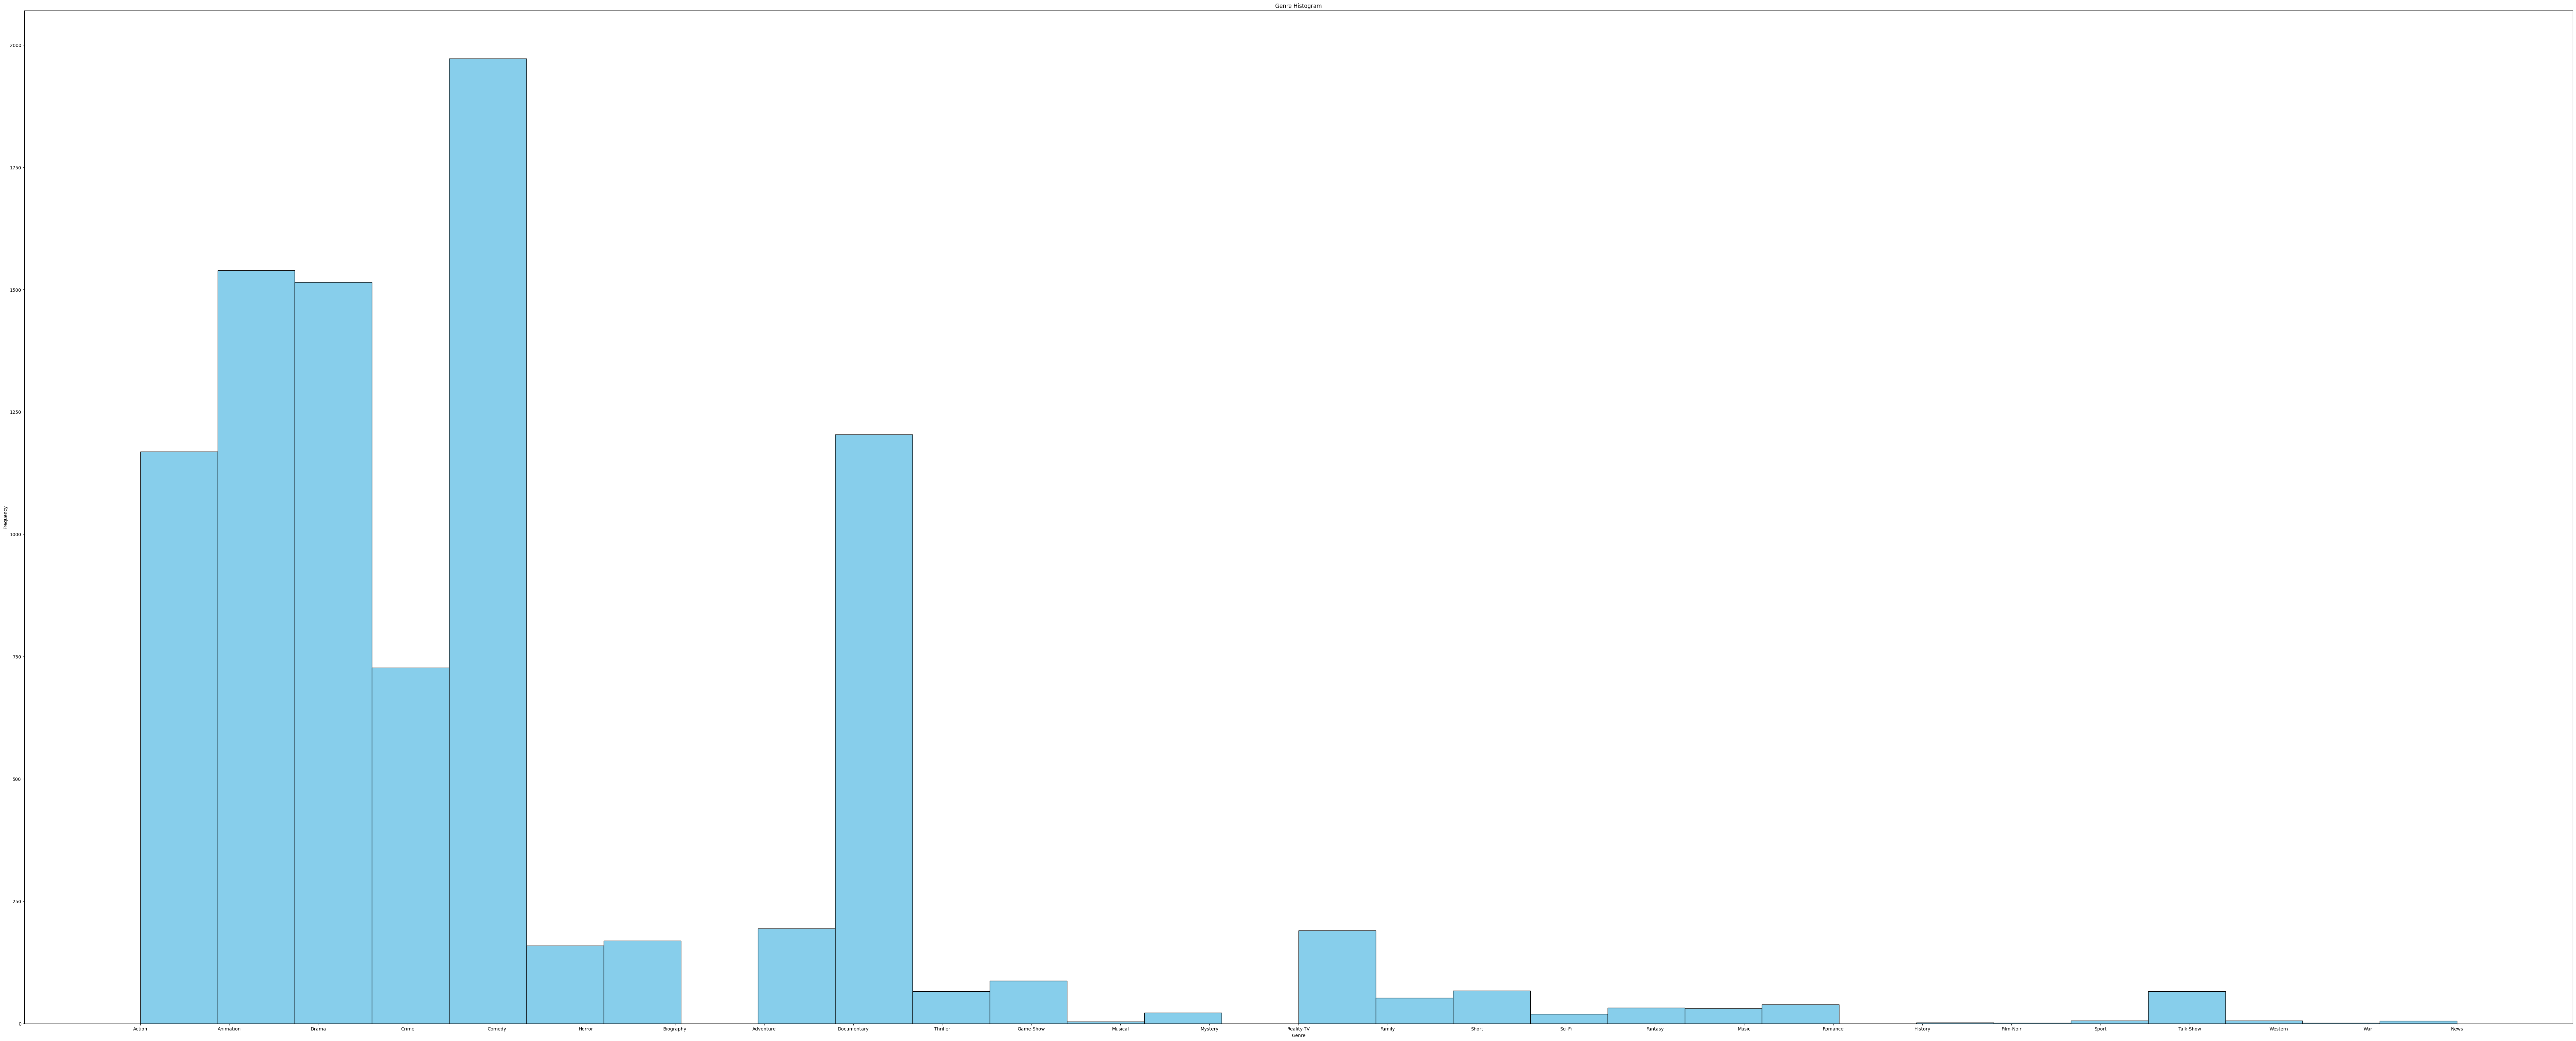

In [142]:
plt.figure(figsize=(100, 40))
plt.hist(df['GENRE'], bins=30, color='skyblue', edgecolor='black')
# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Histogram')
 
# Display the plot
plt.show()
# animation is the mode

<function matplotlib.pyplot.show(close=None, block=None)>

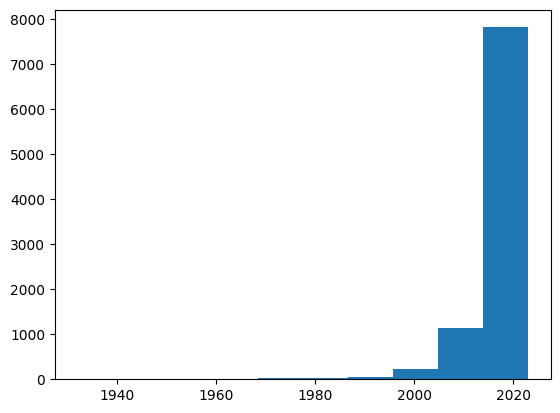

In [143]:
plt.hist(df["YEAR"])
plt.show
# Most media came out near 2020
# exponential increase in media 

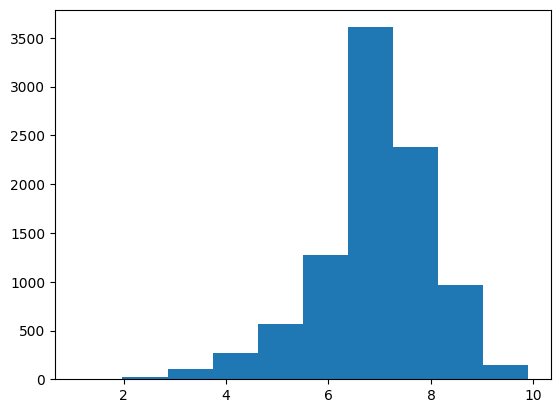

In [144]:
plt.hist(df["RATING"])
plt.show()
# Most movies have around a 7 out of 10 rating

In [145]:
df["RunTime"] = df["RunTime"]/60

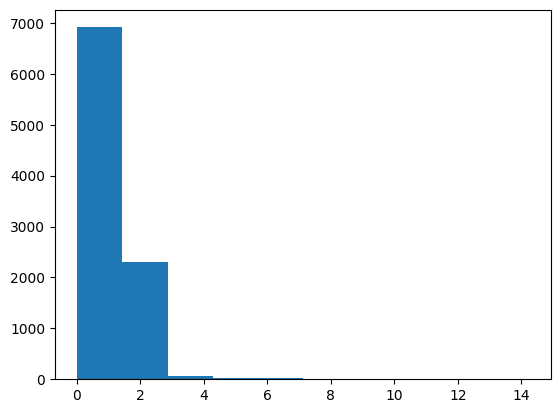

In [146]:
plt.hist(df["RunTime"])
plt.show()
#most media ranges between 0 and 2 hours

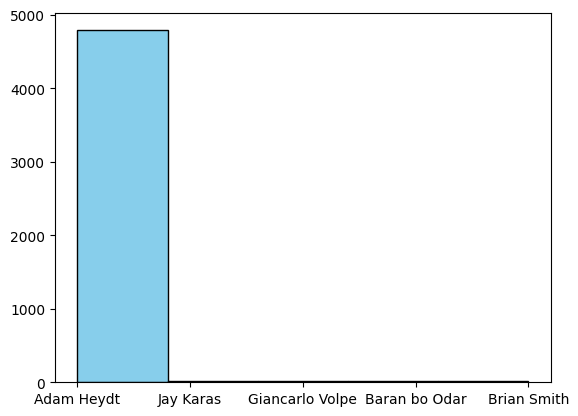

In [147]:
TOP_5_DIRECTORS = df["Director"].value_counts().head(5)
filtered_df = df[df["Director"].isin(TOP_5_DIRECTORS.index)]
plt.hist(filtered_df["Director"], bins=len(TOP_5_DIRECTORS), color='skyblue', edgecolor='black')
plt.show()
#top 5 directors in frequency

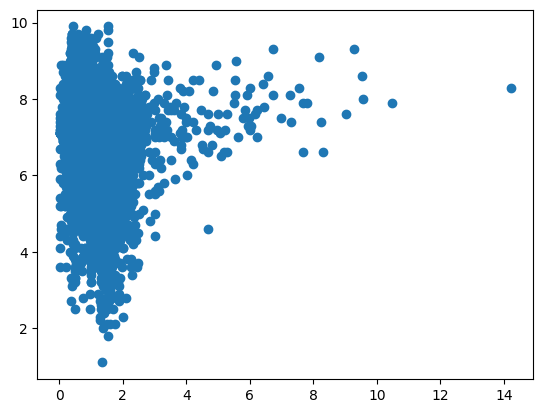

In [148]:
plt.scatter(df["RunTime"], df["RATING"])
plt.show()
# runtime has mostly no correlation with rating